<a href="https://colab.research.google.com/github/yahia-kplr/Deep-Learning-Neural-Networks/blob/main/Perceptron-Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Perceptron with SciKit-Learn
===================================

In [1]:
import numpy as np
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron

import matplotlib.pyplot as plt
import matplotlib

import deepmods.notebook as ooo

ooo.init(id='13', save_figs=True)



Deepmod by pjluc 2019
  Version          : 0.4
  Run time         : Monday 16 September 2019, 10:57:22
  Run directory    : ./run/lab-13
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


Récupération des données IRIS
-----------------------------
Récupération : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  
A propos des datasets : http://scikit-learn.org/stable/datasets/index.html  
Données :  
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm
- 4 : class nb (0=Iris-Setosa, 1=Iris-Versicolour, 2=Iris-Virginica)


In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]    # longueur des pétales, largeur des pétales
y=iris.target.copy()
y[iris.target==0]=1        # 1 = Iris setosa
y[iris.target>=1]=0        # 0 = Pas iris setosa

print('Examples :')
print('Length   Width   Iris Setosa (0/1)')
print('  x1       x2          y')
for i in range(45,55):
    print(" {:3.1f}      {:3.1f}          {}".format(X[i][0], X[i][0], y[i]))


pct = Perceptron(max_iter=100, random_state=82, tol=0.01)
pct.fit(X, y)

Examples :
Length   Width   Iris Setosa (0/1)
  x1       x2          y
 1.4      1.4          1
 1.6      1.6          1
 1.4      1.4          1
 1.5      1.5          1
 1.4      1.4          1
 4.7      4.7          0
 4.5      4.5          0
 4.9      4.9          0
 4.0      4.0          0
 4.6      4.6          0


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=82, shuffle=True, tol=0.01,
           validation_fraction=0.1, verbose=0, warm_start=False)


Prédictions
-----------

In [3]:
print("Longueur=2.0, largeur=0.5 =>   Prediction=",pct.predict([[2.0, 0.5]]) )
print("Longueur=5.0, largeur=1.5 =>   Prediction=",pct.predict([[5.0, 1.5]]) )

Longueur=2.0, largeur=0.5 =>   Prediction= [1]
Longueur=5.0, largeur=1.5 =>   Prediction= [0]


Visualisation
-------------

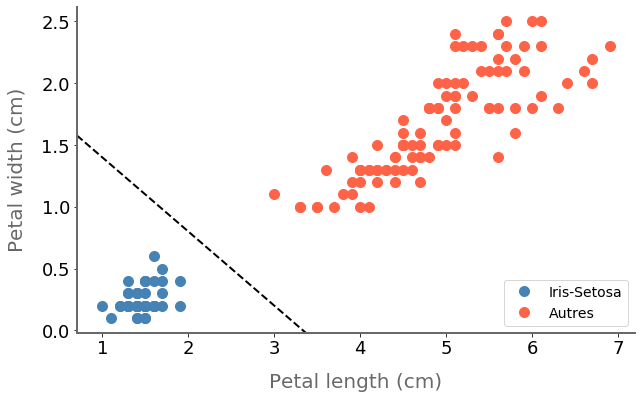

In [4]:
a = -pct.coef_[0][0] / pct.coef_[0][1]
b = -pct.intercept_ / pct.coef_[0][1]
box=[X.min(axis=0)[0],X.max(axis=0)[0],X.min(axis=0)[1],X.max(axis=0)[1]]
mx=(box[1]-box[0])/20
my=(box[3]-box[2])/20
box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(10,6)
axs.plot(X[y==1, 0], X[y==1, 1], "o", label="Iris-Setosa")
axs.plot(X[y==0, 0], X[y==0, 1], "o", label="Autres")
axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
axs.legend(loc="lower right", fontsize=14)
axs.set_xlim(box[0],box[1])
axs.set_ylim(box[2],box[3])

ooo.save_fig('Perceptron-a')
plt.show()